# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
Read in the advertising.csv file and set it to a data frame called ad_data.

In [2]:
ad_data = pd.read_csv('data/advertising.csv')

Check the head of ad_data

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


Use info and describe() on ad_data

In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exercise 1 - Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

Create a histogram of the Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

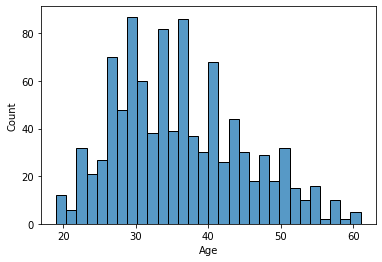

In [6]:
sns.histplot(data=ad_data,x="Age",bins=30)

Create a jointplot showing Area Income versus Age.

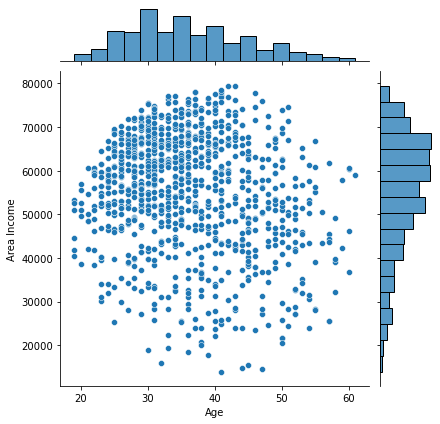

In [7]:
sns.jointplot(data=ad_data,x="Age",y="Area Income")

Create a jointplot showing the distributions (histograms) of Daily Time spent on site vs. Age.

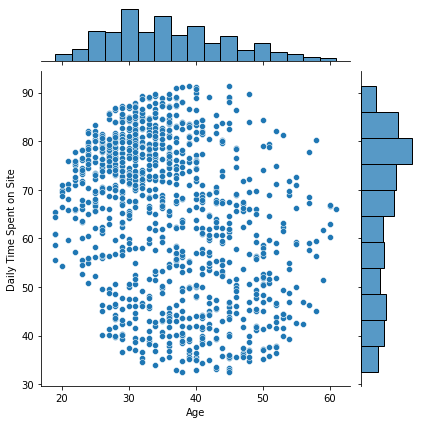

In [8]:
sns.jointplot(data=ad_data,x="Age",y="Daily Time Spent on Site")

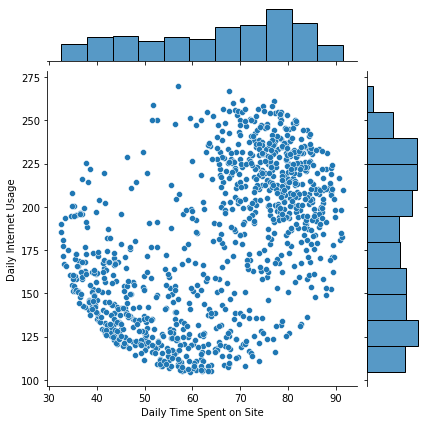

In [9]:
sns.jointplot(data=ad_data,x="Daily Time Spent on Site",y="Daily Internet Usage")

Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'

Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.

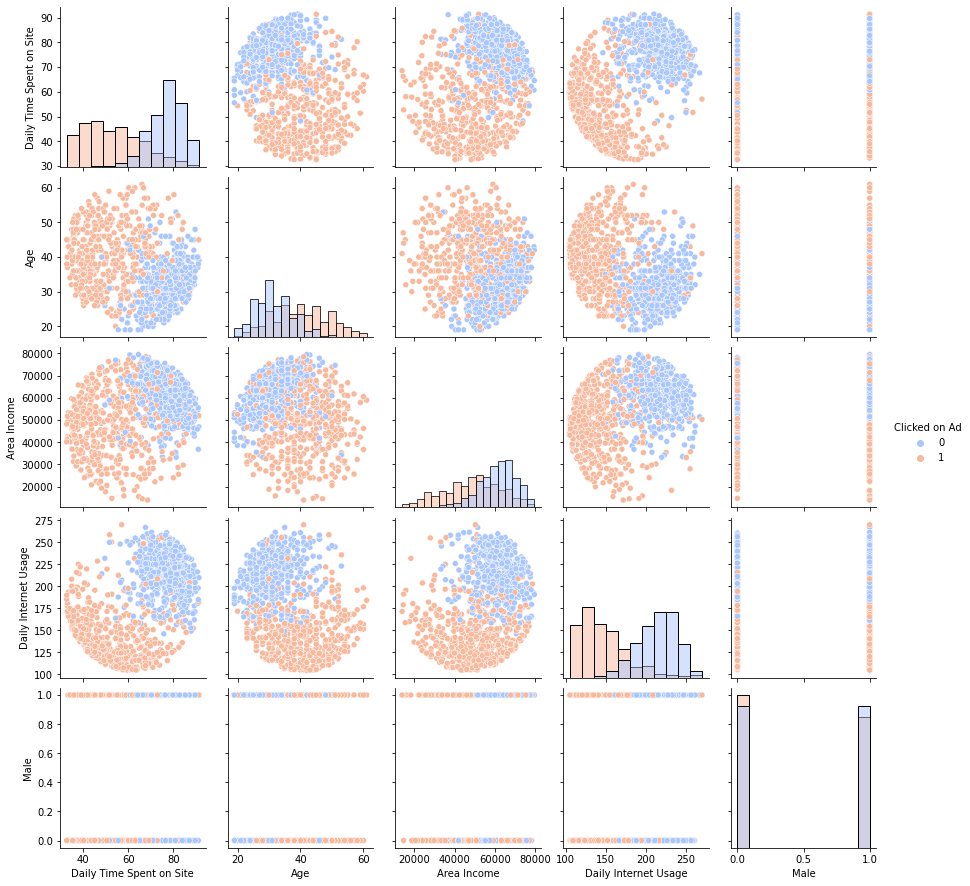

In [10]:
sns.pairplot(data=ad_data,hue="Clicked on Ad",palette="coolwarm",diag_kind="hist")

## Exercise 2 - Training Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

Split the data into training set and testing set using train_test_split

In [11]:
from sklearn.model_selection import train_test_split

X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
#only numerical values 
y = ad_data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#auswendig lernen
# in random state split wird anderes sein wenn wir die Zahl nich timmer gleich nutz

Train and fit a logistic regression model on the training set.

In [12]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()#create instance of this model
logmodel.fit(X_train,y_train)

LogisticRegression()

## Exercise 3 - Predictions and Evaluations
Now predict values for the testing data.

In [13]:
predictions = logmodel.predict(X_test)
predictions

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,

Create a classification report for the model.

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



Create a confusion matrix for the model.

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[156,   6],
       [ 25, 143]])

Draw ROC-curve for the model and compute AUC.

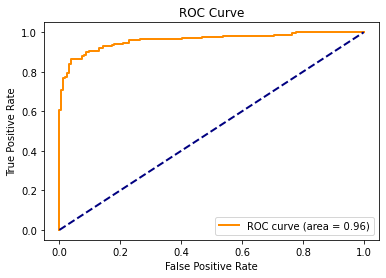

In [16]:
from sklearn.metrics import roc_curve, auc #import roc kurv 
y_predict_probabilities = logmodel.predict_proba(X_test)[:,1] 
#klammer wollen wir nur prob das auf den add gelickt wurde
#we dont want prediction of values just probability for class
fpr, tpr, thr = roc_curve(y_test, y_predict_probabilities)
#nutzen das um fpr tpr und trashhold predicten
roc_auc = auc(fpr, tpr)# brechnet die AUC

plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
# niemals alles aufschreiben aber fragen was das bedeutet
#oder schreibe Zeile 5-9
#oder schreibeZeile  2-4

In [18]:
#how many trashholds
len(thr)

50

In [20]:
len(X_test)

330

In [21]:
thr

array([1.99941851, 0.99941851, 0.91144976, 0.90848675, 0.86087841,
       0.85678832, 0.69668678, 0.68454911, 0.68326765, 0.66376529,
       0.62962826, 0.62360801, 0.52481542, 0.5136268 , 0.48798968,
       0.39551531, 0.38146709, 0.37936457, 0.32740854, 0.31840754,
       0.31373682, 0.28410276, 0.26924891, 0.23149423, 0.22215759,
       0.19163544, 0.1910623 , 0.17118747, 0.16855096, 0.160305  ,
       0.15727008, 0.1367158 , 0.13222585, 0.11790455, 0.1138748 ,
       0.10071035, 0.09740184, 0.06810959, 0.06672444, 0.05320793,
       0.05070097, 0.03911912, 0.03859958, 0.02656102, 0.02654217,
       0.02281309, 0.02254137, 0.02188744, 0.02170894, 0.0065874 ])

In [22]:
tpr

array([0.        , 0.00595238, 0.60714286, 0.60714286, 0.70833333,
       0.70833333, 0.76785714, 0.76785714, 0.77380952, 0.77380952,
       0.79166667, 0.79166667, 0.83928571, 0.83928571, 0.86309524,
       0.86309524, 0.88095238, 0.88095238, 0.88690476, 0.88690476,
       0.89880952, 0.89880952, 0.9047619 , 0.9047619 , 0.92261905,
       0.92261905, 0.92857143, 0.92857143, 0.93452381, 0.93452381,
       0.94047619, 0.94047619, 0.94642857, 0.94642857, 0.95833333,
       0.95833333, 0.96428571, 0.96428571, 0.9702381 , 0.9702381 ,
       0.97619048, 0.97619048, 0.98214286, 0.98214286, 0.98809524,
       0.98809524, 0.99404762, 0.99404762, 1.        , 1.        ])

In [25]:
fpr


array([0.        , 0.        , 0.        , 0.00617284, 0.00617284,
       0.01234568, 0.01234568, 0.01851852, 0.01851852, 0.02469136,
       0.02469136, 0.0308642 , 0.0308642 , 0.03703704, 0.03703704,
       0.07407407, 0.07407407, 0.08024691, 0.08024691, 0.08641975,
       0.08641975, 0.09876543, 0.09876543, 0.12962963, 0.12962963,
       0.14197531, 0.14197531, 0.17283951, 0.17283951, 0.17901235,
       0.17901235, 0.20987654, 0.20987654, 0.22839506, 0.22839506,
       0.2654321 , 0.2654321 , 0.40123457, 0.40123457, 0.4691358 ,
       0.4691358 , 0.53703704, 0.53703704, 0.7037037 , 0.7037037 ,
       0.7654321 , 0.7654321 , 0.77777778, 0.77777778, 1.        ])

In [26]:
len(fpr)

50